# Import Dependencies

In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# intsall seaborn
!pip install seaborn

Requirement already up-to-date: sklearn in /Users/kristin/opt/anaconda3/lib/python3.8/site-packages (0.0)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Read the CSV

In [3]:
df = pd.read_csv("austinHousingData.csv")
# Drop the null columns where all values are null

# Clean the data 

In [4]:
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,garageSpaces,hasAssociation,hasCooling,...,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,2,True,True,...,9,2019,6011.0,2601,1.266667,2.666667,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,2,True,True,...,10,2020,6185.0,1768,1.400000,2.666667,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,0,True,True,...,7,2019,7840.0,1478,1.200000,3.000000,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,2,True,True,...,8,2018,6098.0,1678,1.400000,2.666667,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,0,True,True,...,10,2018,6708.0,2132,1.133333,4.000000,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


# Basic data analysis

In [5]:
df.describe()

,zpid,zipcode,latitude,longitude,garageSpaces,yearBuilt,latestPrice,latest_salemonth,latest_saleyear,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517000e+04,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,1.517000e+04,15170.000000,15170.000000,1.517000e+04,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000,15170.000000
mean,1.044235e+08,78735.932169,30.291605,-97.778529,1.229268,1988.554450,5.127700e+05,6.732894,2019.078181,1.190771e+05,2208.198748,1.838554,5.780073,2.682858,3.440343,1.467238
std,3.179526e+08,18.893844,0.096970,0.084717,1.352125,21.580139,4.532002e+05,3.146810,0.813934,1.225312e+07,1378.536173,1.068386,1.860231,1.054312,0.849958,0.523696
min,2.858495e+07,78617.000000,30.085030,-98.022057,0.000000,1905.000000,5.500000e+03,1.000000,2018.000000,1.000000e+02,300.000000,0.200000,2.333333,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203328,-97.838015,0.000000,1974.000000,3.090000e+05,4.000000,2018.000000,6.534000e+03,1483.000000,1.100000,4.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284441,-97.769524,1.000000,1993.000000,4.050000e+05,7.000000,2019.000000,8.276000e+03,1975.000000,1.566667,5.778694,3.000000,3.000000,1.000000
75%,7.033763e+07,78749.000000,30.366594,-97.717899,2.000000,2006.000000,5.750000e+05,9.000000,2020.000000,1.089000e+04,2687.000000,2.266667,7.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,22.000000,2020.000000,1.350000e+07,12.000000,2021.000000,1.508483e+09,109292.000000,9.000000,9.500000,27.000000,20.000000,4.000000


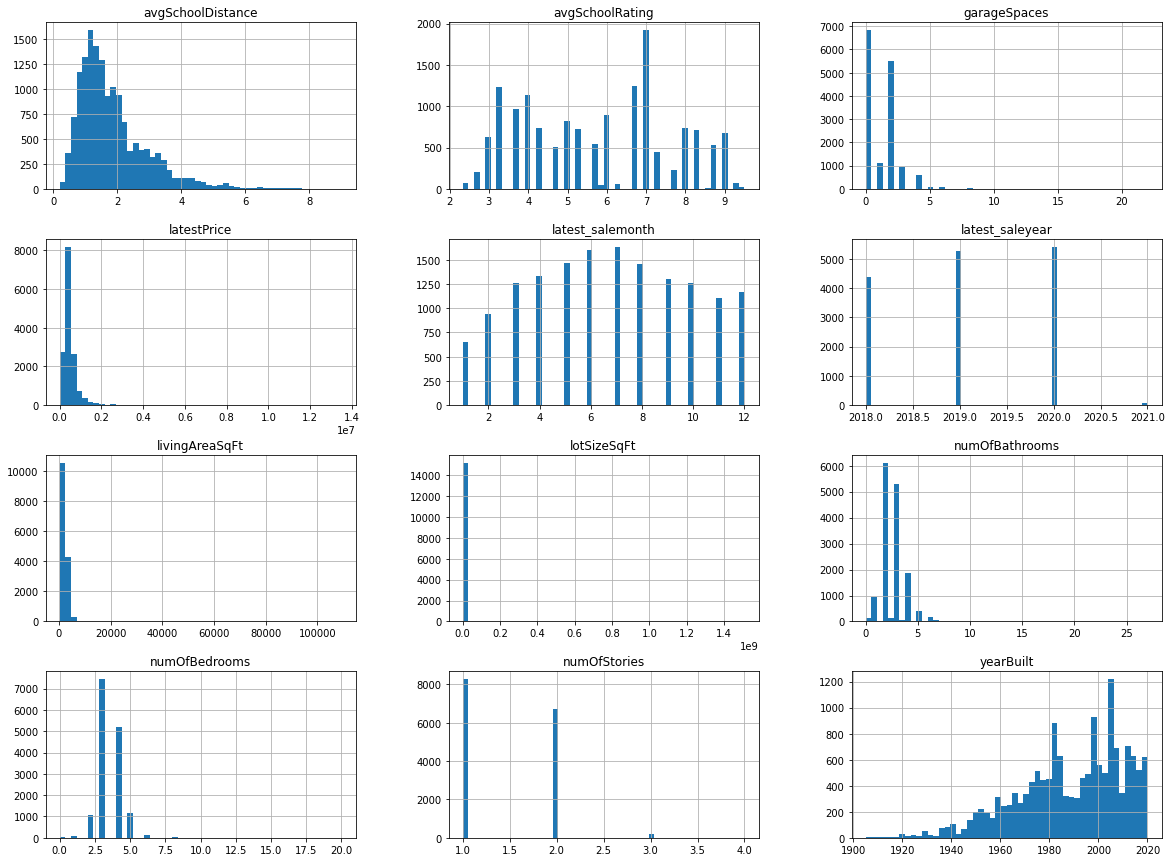

In [6]:
# Charting selected features
selected_features = df[['latest_saleyear','yearBuilt','garageSpaces', 'lotSizeSqFt',
                        'livingAreaSqFt', 'numOfBathrooms', 'numOfBedrooms', 'numOfStories',
                        'avgSchoolRating','avgSchoolDistance', 'latestPrice', 'latest_salemonth']]

selected_features.hist(bins=50, figsize=(20,15))
# plt.savefig("attribute_histogram_plots")
plt.show()

# Determine feature correlation

In [7]:
#correlation matrix
corr_matrix = df.corr()
corr_matrix["latestPrice"].sort_values(ascending=False)

latestPrice          1.000000
numOfBathrooms       0.504829
livingAreaSqFt       0.467070
numOfBedrooms        0.299846
avgSchoolRating      0.293111
numOfStories         0.200567
garageSpaces         0.157443
hasView              0.133968
avgSchoolDistance    0.094154
latitude             0.071545
latest_saleyear      0.059950
yearBuilt            0.059694
latest_salemonth     0.033902
lotSizeSqFt          0.020940
hasCooling           0.010057
zpid                 0.007502
hasAssociation      -0.005048
zipcode             -0.145945
longitude           -0.184082
Name: latestPrice, dtype: float64

In [8]:
corr_matrix.shape

(19, 19)

<AxesSubplot:>

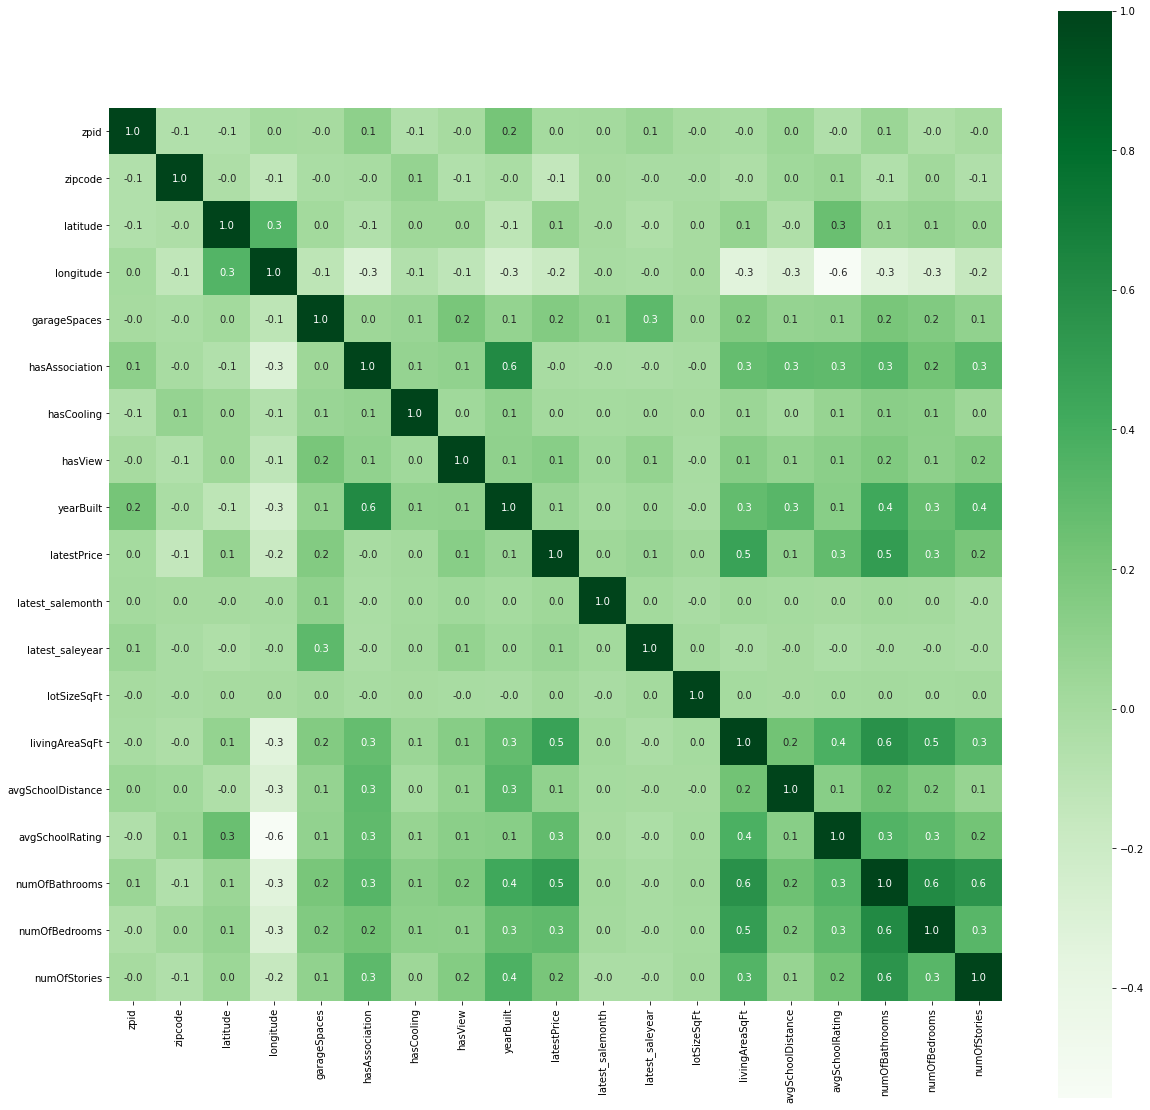

In [9]:
# Heatmap of correlation 
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# Select your features (columns)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15170 entries, 0 to 15169
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zpid               15170 non-null  int64  
 1   city               15170 non-null  object 
 2   streetAddress      15170 non-null  object 
 3   zipcode            15170 non-null  int64  
 4   description        15170 non-null  object 
 5   latitude           15170 non-null  float64
 6   longitude          15170 non-null  float64
 7   garageSpaces       15170 non-null  int64  
 8   hasAssociation     15170 non-null  bool   
 9   hasCooling         15170 non-null  bool   
 10  hasView            15170 non-null  bool   
 11  homeType           15170 non-null  object 
 12  yearBuilt          15170 non-null  int64  
 13  latestPrice        15170 non-null  int64  
 14  latest_salemonth   15170 non-null  int64  
 15  latest_saleyear    15170 non-null  int64  
 16  lotSizeSqFt        151

In [11]:
# Set features. This will also be used as your x values.
selected_features = df[['yearBuilt','livingAreaSqFt', 
                        'numOfBathrooms', 'numOfBedrooms']]

selected_features.head()

,yearBuilt,livingAreaSqFt,numOfBathrooms,numOfBedrooms
0,2012,2601,3.0,4
1,2013,1768,2.0,4
2,2018,1478,2.0,3
3,2013,1678,2.0,3
4,2002,2132,3.0,3


# Train, Test, Split

In [12]:
# train, test, split
X = selected_features
y = df['latestPrice'].values.reshape(-1, 1)
print(X.shape, y.shape)

(15170, 4) (15170, 1)


In [13]:
# split the data to train and test values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X_train.head()

,yearBuilt,livingAreaSqFt,numOfBathrooms,numOfBedrooms
1145,2005,1650,2.0,4
8937,1998,1678,2.0,3
15077,1949,952,1.0,2
13509,1987,2694,3.0,5
733,1993,3114,3.0,5


# Create the Model

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the Model



In [16]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.36090013586032
Testing Score: 0.2970367557365564


# Plot Residuals

Text(0.5, 1.0, 'Residual Plot')

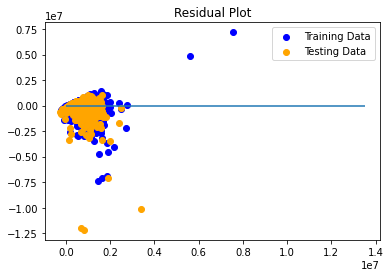

In [17]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Save the Model

In [18]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'your_name.sav'
# joblib.dump(your_model, filename)